<a href="https://colab.research.google.com/github/Sathaporn16277/Motor_Insulation_Analyzer_/blob/main/Motor_Insulation_Analyzer_Ver_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
from ipywidgets import Dropdown, Output, HBox, VBox, Button
from IPython.display import clear_output, display
import ipywidgets as widgets
import natsort

In [ ]:
class PITestAnalyzer:

  def __init__(self):
    self.path = "/content/drive/Shareddrives/SKCA 16 PE TPM TEAM/20.PI_TEST/Data"
    self.production_line_folder = natsort.natsorted(os.listdir(self.path))
    self.setup_gui()

  def setup_gui(self):
        self.dropdown1 = Dropdown(
            options=self.production_line_folder,
            value=None,
            description='Production Line:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        self.dropdown1.layout.margin = '0 10px'
        self.dropdown1.observe(self.update_machine_list, names='value')

        self.dropdown2 = Dropdown(
            options="",
            value=None,
            description='Machine:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        self.dropdown2.layout.margin = '0 10px'
        self.dropdown2.observe(self.update_motor_type_list, names='value')

        self.dropdown3 = Dropdown(
            options="",
            value=None,
            description='Motor Type:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        self.dropdown3.layout.margin = '0 10px'
        self.dropdown3.observe(self.update_motor_list, names='value')

        self.dropdown4 = Dropdown(
            options="",
            value=None,
            description='Motor:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        self.dropdown4.layout.margin = '0 10px'
        self.dropdown4.observe(self.update_file_list, names='value')

        self.dropdown5 = Dropdown(
            options="",
            value=None,
            description='File:',
            disabled=False,
            style={'description_width': 'initial'}
        )
        self.dropdown5.layout.margin = '0 10px'

        self.button1 = Button(description='Import')
        self.button1.on_click(self.button_eventhandler)
        self.button1.layout.margin = '0 10px'

        self.gui = HBox([self.dropdown1, self.dropdown2, self.dropdown3, self.dropdown4, self.dropdown5, self.button1])

  def update_machine_list(self, change):
    if self.dropdown1.value != None:
      self.dropdown2.options = natsort.natsorted(os.listdir(self.path + "/" + self.dropdown1.value))
      self.dropdown3.options, self.dropdown4.options, self.dropdown5.options = [""], [""], [""]
      self.dropdown2.value, self.dropdown3.value, self.dropdown4.value, self.dropdown5.value = None, None, None, None

  def update_motor_type_list(self, change):
    if self.dropdown1.value != None and self.dropdown2.value != None:
      self.dropdown3.options = natsort.natsorted(os.listdir(self.path + "/" + self.dropdown1.value + "/" + self.dropdown2.value))
      self.dropdown4.options, self.dropdown5.options = [""], [""]
      self.dropdown3.value, self.dropdown4.value, self.dropdown5.value = None, None, None

  def update_motor_list(self, change):
    if self.dropdown1.value != None and self.dropdown2.value != None and self.dropdown3.value != None:
      self.dropdown4.options = natsort.natsorted(os.listdir(self.path + "/" + self.dropdown1.value + "/" + self.dropdown2.value + "/" + self.dropdown3.value))
      self.dropdown5.options = [""]
      self.dropdown4.value, self.dropdown5.value = None, None

  def update_file_list(self, change):
    if self.dropdown1.value != None and self.dropdown2.value != None and self.dropdown3.value != None and self.dropdown4.value != None:
      self.file_folder_path = self.path + "/" + self.dropdown1.value + "/" + self.dropdown2.value + "/" + self.dropdown3.value + "/" + self.dropdown4.value
      self.dropdown5.options = natsort.natsorted(os.listdir(self.path + "/" + self.dropdown1.value + "/" + self.dropdown2.value + "/" + self.dropdown3.value + "/" + self.dropdown4.value))
      self.dropdown5.value = None

  def button_eventhandler(self, obj):
    self.df = pd.read_excel(self.path + "/" + self.dropdown1.value + "/" + self.dropdown2.value + "/" + self.dropdown3.value + "/" + self.dropdown4.value + "/" + self.dropdown5.value, usecols='D,J,P', skiprows=9, nrows=62, header=None, names=['R','S','T'])

    if len(self.df) < 61:
      self.df.loc[-1] = [0.01] * len(self.df.columns)
      self.df.index = self.df.index + 1
      self.df = self.df.sort_index()

    else:
      if self.df['R'].iloc[-1] != self.df['R'].iloc[-1]:
        new_column = self.df['R']
        new_column.loc[-1] = 0.01
        new_column.index = new_column.index + 1
        new_column = new_column.sort_index()
        self.df['R'] = new_column

      if self.df['S'].iloc[-1] != self.df['S'].iloc[-1]:
        new_column = self.df['S']
        new_column.loc[-1] = 0.01
        new_column.index = new_column.index + 1
        new_column = new_column.sort_index()
        self.df['S'] = new_column

      if self.df['T'].iloc[-1] != self.df['T'].iloc[-1]:
        new_column = self.df['T']
        new_column.loc[-1] = 0.01
        new_column.index = new_column.index + 1
        new_column = new_column.sort_index()
        self.df['T'] = new_column

    time = pd.DataFrame(np.arange(0, 305, 5, dtype=int), columns=['Time'])
    self.df = pd.concat([time["Time"], self.df], axis=1)
    clear_output(wait=True)
    self.display_gui()
    self.plot_all_phase(self.df)
    self.pi_detection(self.df)



  def plot_all_phase(self, data):
    print("\n")
    plt.figure(figsize=(19.2, 3))
    plt.clf()
    plt.plot(data["Time"], data["R"], label='R', color="blue", marker='o', markersize=4, linestyle='-')
    plt.plot(data["Time"], data["S"], label='S', color="green", marker='o', markersize=4, linestyle='-')
    plt.plot(data["Time"], data["T"], label='T', color="orange", marker='o', markersize=4, linestyle='-')
    plt.ylabel("Resistance (MΩ)")
    plt.xlabel("Time (sec.)")
    plt.title('PI Test')
    plt.legend(loc='upper left', frameon=True)
    plt.grid(True)
    plt.xlim([-20, 301])
    plt.show()

  def score_test(self, data, danger, warning):
    score = len(data)
    max = np.max(data)
    mean = np.mean(data)
    last = data[len(data)-1]

    status = ""
    color = ""

    if len(danger) > 0:
      score = score - (0.4*len(data))

    if len(warning) > 0:
      score = score - (0.1*len(warning)*len(data))

    if data[12]/data[6] < 1:
      score = score - (0.2*len(data))

    if last < max:
      score = score - (((max-last)/max)*len(data))

    if last < mean:
      score = score - (((mean-last)/mean)*len(data)*1.5)

    for i in range(12,len(data)):
      if data[i] < 100:
        score = score - 3


    score = (score/len(data))*100

    if score > 75:
      status = "Normal"
      color = "green"
    elif score <= 75 and score > 50:
      status = "Warning"
      color = "yellow"
    elif score <= 50 and score >= 0:
      status = "Danger"
      color = "red"
    elif score < 0:
      score = 0
      status = "Danger"
      color = "red"

    return score, status, color

  def detect_decrease_before_increase(self, data):
    decreasing = False
    result_danger = []
    result_warning = []
    for i in range(1, len(data)):
      if data[i-1] < data[i]:
        decreasing = True

      if data[i-1] - data[i] >= (0.2*data[i-1]) and data[i-1] - data[i] < (0.5*data[i-1]) and decreasing:
        result_warning.append(i)

      elif data[i-1] - data[i] >= (0.5*data[i-1]) and decreasing:
        result_danger.append(i)
        decreasing = False

    return result_danger, result_warning

  def pi_detection(self, data):
    danger_R, warning_R = self.detect_decrease_before_increase(data["R"])
    danger_S, warning_S = self.detect_decrease_before_increase(data["S"])
    danger_T, warning_T = self.detect_decrease_before_increase(data["T"])

    score_R, status_R, color_R = self.score_test(data["R"], danger_R, warning_R)
    score_S, status_S, color_S = self.score_test(data["S"], danger_S, warning_S)
    score_T, status_T, color_T = self.score_test(data["T"], danger_T, warning_T)

    x = np.array(data["Time"])

    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 6), sharex=True)

    ax1.plot(x, data["R"], label='R', color="blue", marker='o', markersize=4, linestyle='-')
    ax1.text(1.01, 0.95, f"Max: {np.max(data['R']):,.2f} MΩ\nMean: {np.mean(data['R']):,.2f} MΩ\nLast: {data['R'][len(data['R'])-1]:.2f} MΩ", transform=ax1.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax1.text(1.01, 0.50, f"Score: {score_R:.2f} %\nStatus: {status_R}", transform=ax1.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), color=color_R)
    for i in danger_R:
      ax1.axvspan(x[i-1], x[i], alpha=0.5, color='red')
    for i in warning_R:
      ax1.axvspan(x[i-1], x[i], alpha=0.5, color='yellow')
    ax1.set_title("Phase R")
    ax1.set_ylabel("Resistance (MΩ)")
    ax1.legend(loc='upper left', frameon=True)
    ax1.grid(True)
    ax1.set_xlim([-20, 301])

    ax2.plot(x, data["S"], label='S', color="green", marker='o', markersize=4, linestyle='-')
    ax2.text(1.01, 0.95, f"Max: {np.max(data['S']):,.2f} MΩ\nMean: {np.mean(data['S']):,.2f} MΩ\nLast: {data['S'][len(data['S'])-1]:.2f} MΩ", transform=ax2.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax2.text(1.01, 0.50, f"Score: {score_S:.2f} %\nStatus: {status_S}", transform=ax2.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), color=color_S)
    for i in danger_S:
      ax2.axvspan(x[i-1], x[i], alpha=0.5, color='red')
    for i in warning_S:
      ax2.axvspan(x[i-1], x[i], alpha=0.5, color='yellow')
    ax2.set_title("Phase S")
    ax2.set_ylabel("Resistance (MΩ)")
    ax2.legend(loc='upper left', frameon=True)
    ax2.grid(True)
    ax2.set_xlim([-20, 301])

    ax3.plot(x, data["T"], label='T', color="orange", marker='o', markersize=4, linestyle='-')
    ax3.text(1.01, 0.95, f"Max: {np.max(data['T']):,.2f} MΩ\nMean: {np.mean(data['T']):,.2f} MΩ\nLast: {data['T'][len(data['T'])-1]:.2f} MΩ", transform=ax3.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
    ax3.text(1.01, 0.50, f"Score: {score_T:.2f} %\nStatus: {status_T}", transform=ax3.transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5), color=color_T)
    for i in danger_T:
      ax3.axvspan(x[i-1], x[i], alpha=0.5, color='red')
    for i in warning_T:
      ax3.axvspan(x[i-1], x[i], alpha=0.5, color='yellow')
    ax3.set_title("Phase T")
    ax3.set_ylabel("Resistance (MΩ)")
    ax3.set_xlabel("Time (sec.)")
    ax3.legend(loc='upper left', frameon=True)
    ax3.grid(True)
    ax3.set_xlim([-20, 301])

    plt.tight_layout()
    plt.show()

  def display_gui(self):
    display(self.gui)

# GUI

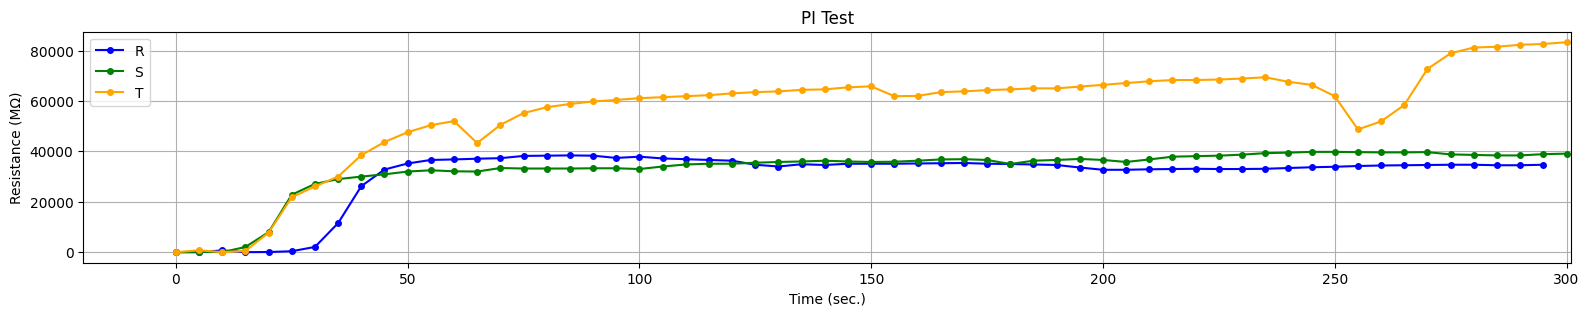

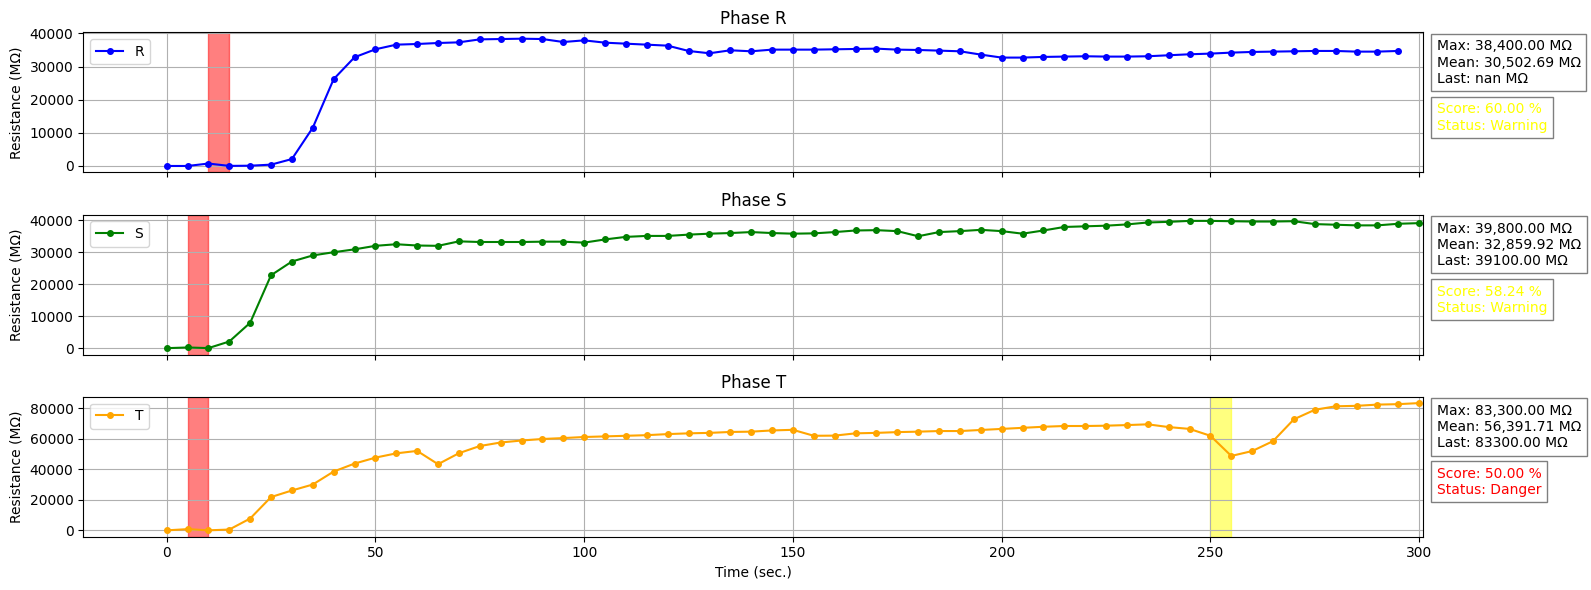

In [ ]:
# @title { vertical-output: true }
PITestAnalyzer().display_gui()